Image captioning is a technique in computer vision that generates descriptive text for images by combining visual analysis and language modeling. It uses an encoder-decoder architecture, where the encoder (e.g., a CNN or transformer) extracts image features, and the decoder (e.g., an LSTM or transformer) translates these into words. Models often employ attention mechanisms to focus on relevant image parts when generating each word. Vision-language models like BLIP or CLIP handle these tasks by jointly understanding image and text data. Training involves large datasets (e.g., MS-COCO) with image-caption pairs, using metrics like BLEU and CIDEr for evaluation. Transformers and cross-modal techniques have significantly advanced the field, making captions more contextually accurate and meaningful.

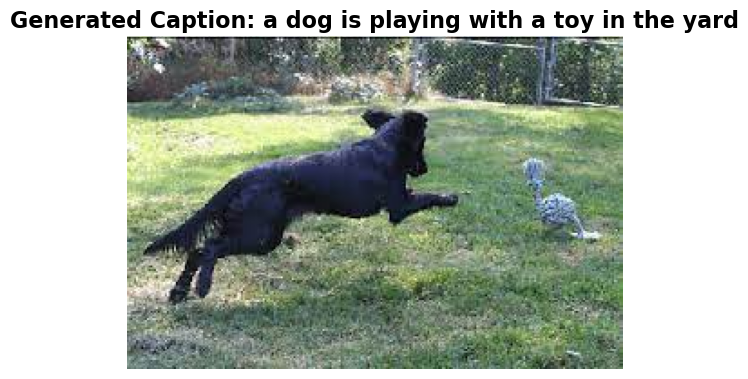

In [5]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Load the BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Generate caption
def generate_caption_blip(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    out = model.generate(**inputs, max_length=50)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

# Display image with caption
def display_image_with_caption(image_path):
    caption = generate_caption_blip(image_path)
    image = Image.open(image_path)

    plt.imshow(image)
    plt.axis("off")
    plt.title("Generated Caption: " + caption, fontsize=16, fontweight='bold')
    plt.show()
    

# Example usage
display_image_with_caption("img3.jpg")
